# Create state shapefile

This notebook modifies a GeoJSON with state and national boundaries and makes it suitable for creating choropleths with `GeoPandas`.

In [1]:
import geopandas as gpd
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# load json
states = gpd.read_file("../data/geo/states.json")

Because this is a geojson file intended for web-development, the y-values are reversed 

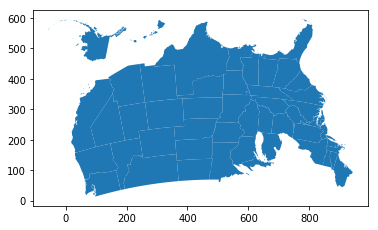

In [3]:
states.plot();

Flip the y-axis

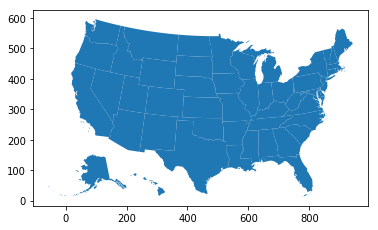

In [4]:
# get bounds, calculate center
b = states.total_bounds
center = [(b[0] + b[2])/2, (b[1] + b[3])/2]

# flip y-axis (b/c geojson)
states['geometry'] = states.scale(
    xfact=1, 
    yfact=-1,
    origin=tuple(center)
)

# get fips codes from census
fips = pd.read_csv("../data/geo/states_fips.csv",
                   delimiter="|",
                   dtype=str
                   ).rename({"STATE": "id"}, axis=1)

merged = states.merge(fips,
                      on="id",
                      how="left")

merged.plot();

Write out

In [5]:
merged.to_file('../output/states')

---

---

---